In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Read in data from the csv file and store it in the data matrix X.
df = pd.read_csv("data.csv")
X = df.to_numpy()

# Display first 5 rows
print("First five datapoints:")
display(df.head(5))  

First five datapoints:


,Age,Spending
0,28.018868,5.263333
1,27.897623,5.276452
2,29.042011,4.794357
3,29.669165,5.207227
4,29.494291,6.351539


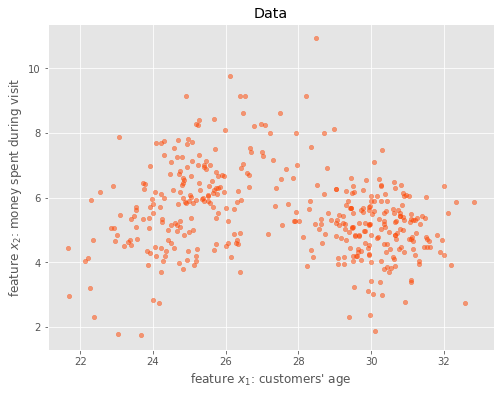

In [5]:
def plotting(data, centroids=None, clusters=None, title='Data', show=True):
    # This function will later on be used for plotting the clusters and centroids. But now we use it to just make a scatter plot of the data
    # Input: the data as an array, cluster means (centroids), cluster assignemnts in {0,1,...,k-1}   
    # Output: a scatter plot of the data in the clusters with cluster means
    plt.figure(figsize=(8,6))
    data_colors = ['orangered', 'dodgerblue', 'springgreen']
    centroid_colors = ['red', 'darkblue', 'limegreen'] # Colors for the centroids
    plt.style.use('ggplot')
    plt.title(title)
    plt.xlabel("feature $x_1$: customers' age")
    plt.ylabel("feature $x_2$: money spent during visit")

    alp = 0.5             # data points alpha
    dt_sz = 20            # marker size for data points 
    cent_sz = 130         # centroid sz 
    
    if centroids is None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
    if centroids is not None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=cent_sz, c=centroid_colors[:len(centroids)])
    if centroids is not None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", c=centroid_colors[:len(centroids)], s=cent_sz)
    if centroids is None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
    
    if show:
        plt.show()

# Plot the (unclustered) data
plotting(X)   


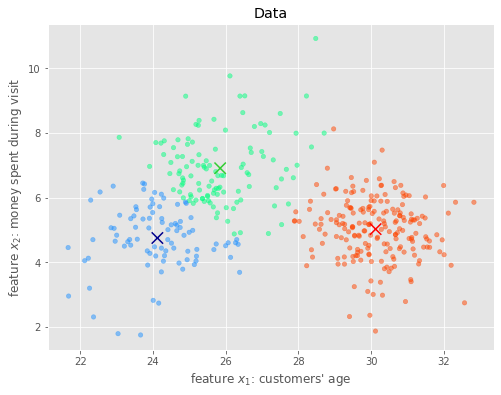

In [15]:
from sklearn.cluster import KMeans

m, n = X.shape    # Get the number of data points m and number of features n

k = 3    # Define number of clusters to use

k_means = KMeans(n_clusters = k, max_iter = 100)  # Create k-means object with k=3 clusters and using maximum 100 iterations
k_means.fit(X)    # Fit the k-means object (find the cluster labels for the datapoints in X)
cluster_means = k_means.cluster_centers_    # Get cluster means (centers)
cluster_indices = k_means.labels_           # Get the cluster labels for each data point

# Plot the clustered data
plotting(X, cluster_means, cluster_indices)

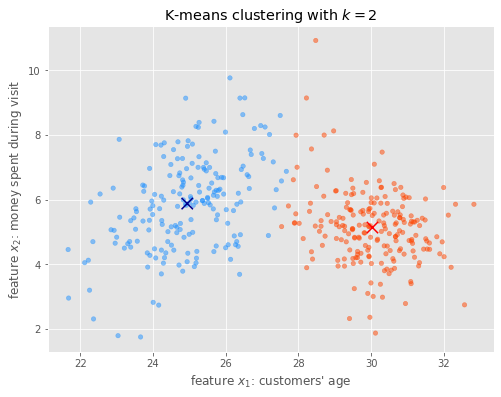

The final cluster mean values are:
 [[30.03164456  5.13271688]
 [24.94326652  5.87406858]]
Sanity check tests passed!


In [22]:
from sklearn.cluster import KMeans

m, n = X.shape    # Get the number of data points m and number of features n

k = 2    # The number of clusters to use

np.random.seed(1)    # Set random seed for reproducability (DO NOT CHANGE THIS!)

### STUDENT TASK ###
cl_means = KMeans(n_clusters=k, max_iter=10)
cl_means.fit(X)

cluster_means = cl_means.cluster_centers_
cluster_indices = cl_means.labels_


# Plot the clustered data
plotting(X, cluster_means, cluster_indices, title='K-means clustering with $k=2$')
print("The final cluster mean values are:\n", cluster_means)

# Perform some sanity checks on the outputs
assert X.shape == (400, 2), f'numpy array X has wrong shape'
assert cluster_means.shape == (2, 2), f'numpy array cluster_means has wrong shape'
assert cluster_indices.shape == (400,), f'numpy array cluster indices has wrong shape'

print('Sanity check tests passed!')


Best clustering error: 2.0217886480924783

Worst clustering error: 2.6240384455808266



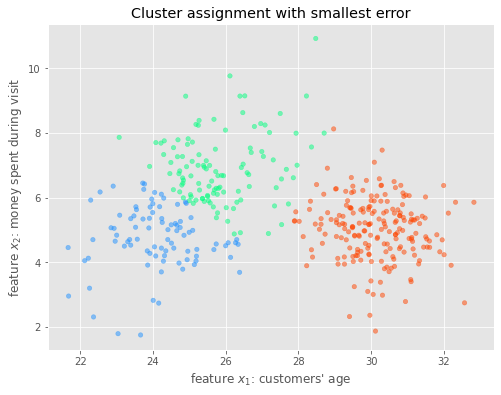

Cluster assignment with largest clustering error:


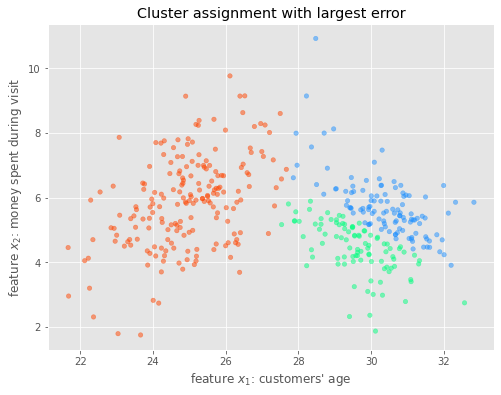

Sanity check tests passed!


In [39]:

m = X.shape[0]  # Number of data points

min_ind = 0  # Store here the index of the repetition yielding smallest clustering error 
max_ind = 0  # .... largest clustering error

cluster_assignment = np.zeros((50, m), dtype=np.int32)  # Array for storing clustering assignments
clustering_err = np.zeros(50,)    # Array for storing the clustering errors for each assignment

np.random.seed(42)   # Set random seed for reproducibility (DO NOT CHANGE THIS!)

init_means_cluster1 = np.random.randn(50,2)  # Use the rows of this numpy array to init k-means 
init_means_cluster2 = np.random.randn(50,2)  # Use the rows of this numpy array to init k-means 
init_means_cluster3 = np.random.randn(50,2)  # Use the rows of this numpy array to init k-means 

best_assignment = np.zeros(m)     # Store here the cluster assignment achieving the smallest clustering error
worst_assignment = np.zeros(m)    # Store here the cluster assignment achieving the largest clustering error

### STUDENT TASK ###
for loop in range(50):
    loopedkmeans = KMeans(n_clusters=3, n_init=1, max_iter=10, init=np.array([
        init_means_cluster1[loop], 
        init_means_cluster2[loop],
        init_means_cluster3[loop]]))
    loopedkmeans.fit(X)
    
    cluster_means = loopedkmeans.cluster_centers_
    cluster_assignment[loop] = loopedkmeans.labels_
    clustering_err[loop] = loopedkmeans.inertia_ / m


min_ind = clustering_err.argmin()
max_ind = clustering_err.argmax()
best_assignment = cluster_assignment[min_ind]
worst_assignment = cluster_assignment[max_ind]

# Print the best and worst clustering errors
print(f"Best clustering error: {clustering_err[min_ind]}\n")
print(f"Worst clustering error: {clustering_err[max_ind]}\n")

# Plot the best and worst cluster assignments (w.r.t. clustering error)
plotting(X, clusters=best_assignment, title='Cluster assignment with smallest error')
print("Cluster assignment with largest clustering error:")
plotting(X, clusters=worst_assignment, title='Cluster assignment with largest error')

# Perform some sanity checks on the solution
assert any(best_assignment != 0), 'You have to assign value for best_assignment ' 
assert any(worst_assignment != 0), 'You have to assign value for worst_assignment ' 
assert best_assignment.shape[0] == 400, 'incorrect cluster labels for minimal clustering error'
assert worst_assignment.shape[0] == 400, 'incorrect cluster labels for maximal clustering error'
print('Sanity check tests passed!')



Clustering errors: 
[9.5232033  2.92348141 2.02178865 1.65213431 1.37075191 1.19051541
 1.01402502 0.91623559]


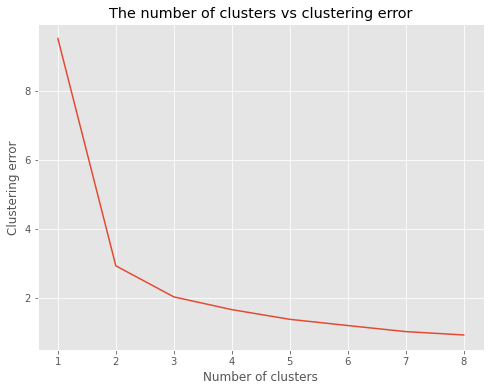

Sanity check tests passed!


In [41]:
m = X.shape[0]    # Number of data points
err_clustering = np.zeros(8)    # Array for storing clustering errors

np.random.seed(1)  # Set random seed

### STUDENT TASK ###
for i in range(8):
    clnrkmeans = KMeans(n_clusters=i+1, max_iter=100)
    clnrkmeans.fit(X)
    err_clustering[i]=clnrkmeans.inertia_ / m


print(f'Clustering errors: \n{err_clustering}')

# Plot the clustering error as a function of the number k of clusters
plt.figure(figsize=(8,6))
plt.plot(range(1,9), err_clustering)
plt.xlabel('Number of clusters')
plt.ylabel('Clustering error')
plt.title("The number of clusters vs clustering error")
plt.show()    

# Perform some sanity checks on the outputs
assert all(err_clustering > 0), 'Store clustering errors for varing number of clusters' 
assert err_clustering.shape == (8,), 'Incorrect shape for errors of models. Use the pre-defined variable err_clustering'
np.testing.assert_allclose(err_clustering[0], 9.5, atol = 0.5 ), 'clustering error when using one cluster is incorrect!'
np.testing.assert_allclose(err_clustering[7], 1, atol = 0.5), 'clustering error when using eight clusters is incorrect!'

print('Sanity check tests passed!')


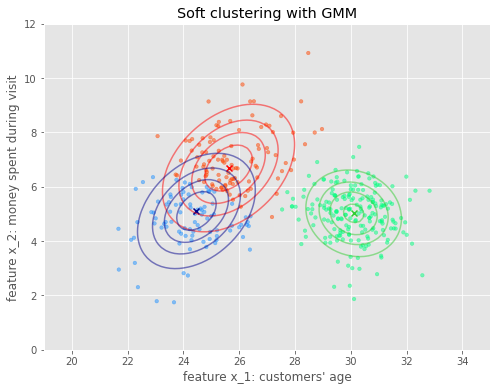

The means are:
 [[25.6154086   6.6874243 ]
 [24.46484646  5.10831508]
 [30.09938306  5.02145697]] 

The covariance matrices are:
 [[[ 1.75539668  0.64515293]
  [ 0.64515293  1.72661107]]

 [[ 1.42319654  0.51707087]
  [ 0.51707087  1.43739154]]

 [[ 1.00676569 -0.1164302 ]
  [-0.1164302   0.87158468]]]
Sanity checks passed


In [48]:

def plot_GMM(data, means, covariances, k, clusters=None):
    
    ## Select three colors for the plot
    # if you want to plot curves k>3, extend these lists of colors
    data_colors = ['orangered', 'dodgerblue', 'springgreen'] # colors for data points
    centroid_colors = ['red', 'darkblue', 'limegreen'] # colors for the centroids
    
    k = means.shape[0]
    plt.figure(figsize=(8,6))    # Set figure size
    if clusters is None:
        plt.scatter(data[:,0], data[:,1], s=13, alpha=0.5)
    else:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=13, alpha=0.5)

    # Visualization of results
    x_plot = np.linspace(19, 35, 100)
    y_plot = np.linspace(0, 12, 100)
    x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
    pos = np.empty(x_mesh.shape + (2,))
    pos[:,:,0] = x_mesh 
    pos[:,:,1] = y_mesh

    # For each cluster, plot the pdf defined by the mean and covariance
    for i in range(k):
        z = multivariate_normal.pdf(pos, mean = means[i,:], cov = covariances[i])
        plt.contour(x_mesh, y_mesh, z, 4, colors=centroid_colors[i], alpha=0.5)
        plt.scatter(means[i,0], means[i,1], marker='x', c=centroid_colors[i])

    plt.title("Soft clustering with GMM")
    plt.xlabel("feature x_1: customers' age")
    plt.ylabel("feature x_2: money spent during visit")
    plt.show()



from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal # Multivariate normal random variable

m, n = X.shape

# Define the number of clusters
k = 3

np.random.seed(1)    # Set random seed for reproducability 

### STUDENT TASK ###
gmm = GaussianMixture(n_components=3)
cluster_labels = gmm.fit_predict(X)
#cluster_labels = gmm.predict(X)
means = gmm.means_
covariances = gmm.covariances_

plot_GMM(X, means, covariances, k, cluster_labels)
print("The means are:\n", means, "\n")
print("The covariance matrices are:\n", covariances)

# Perform some sanity check on the outputs
assert means.shape == (3, 2), "The shape of 'means' is wrong!"
assert covariances.shape == (3, 2, 2), "The shape of 'covariances' is wrong!"
assert cluster_labels.shape == (X.shape[0],)

print('Sanity checks passed')

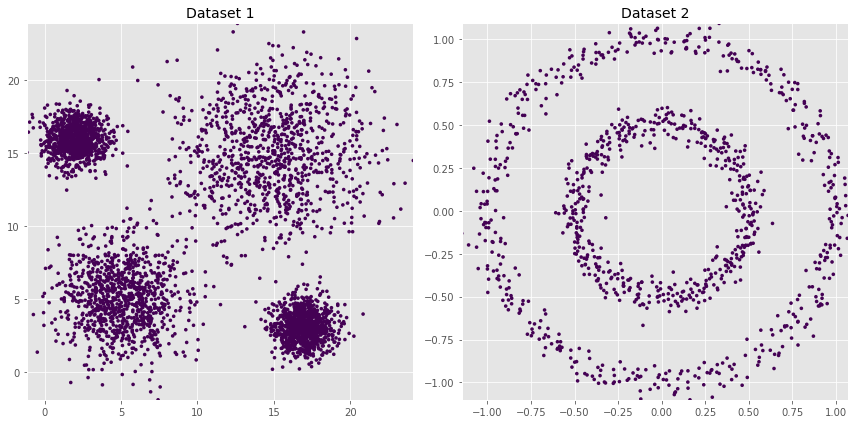

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)    # Set random seed for reproducibility

# Create dataset with separate Gaussian clusters
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# Create dataset containing circular data
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# Function for plotting clustering output on two datasets
def cluster_plots(data_1, data_2, clusters_1, clusters_2, title1='Dataset 1',  title2='Dataset 2'):
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].set_title(title1,fontsize=14)
    ax[0].set_xlim(min(data_1[:,0]), max(data_1[:,0]))
    ax[0].set_ylim(min(data_1[:,1]), max(data_1[:,1]))
    ax[0].scatter(data_1[:,0], data_1[:,1], s=13, lw=0, c=clusters_1)
    ax[1].set_title(title2,fontsize=14)
    ax[1].set_xlim(min(data_2[:,0]), max(data_2[:,0]))
    ax[1].set_ylim(min(data_2[:,1]), max(data_2[:,1]))
    ax[1].scatter(data_2[:,0], data_2[:,1], s=13, lw=0, c=clusters_2)
    fig.tight_layout()
    plt.show()

# Plot the unclustered datasets (i.e. all points belonging to cluster 1)
cluster_plots(dataset1, dataset2, np.ones(dataset1.shape[0]), np.ones(dataset2.shape[0]))

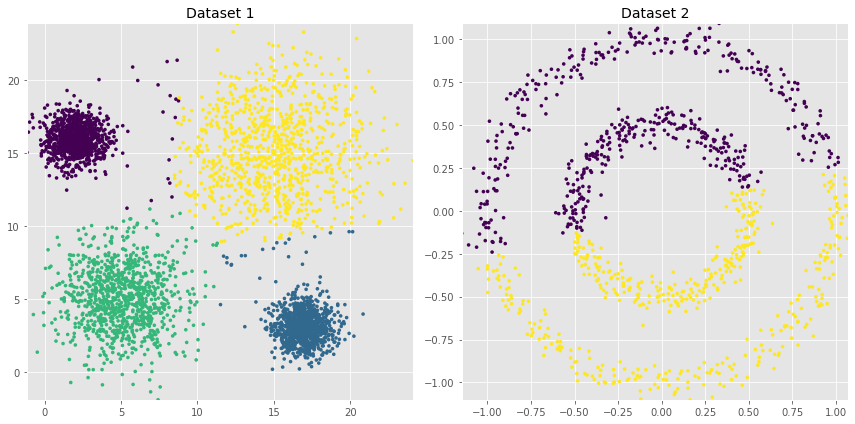

In [52]:
from sklearn.cluster import KMeans

# Perform k-means clustering on both datasets, and get the clusters for each datapoint
k_means_1 = KMeans(n_clusters=4)
k_means_2 = KMeans(n_clusters=2)
clusters_1 = k_means_1.fit_predict(dataset1)
clusters_2 = k_means_2.fit_predict(dataset2)

# Plot the clustered datasets
cluster_plots(dataset1, dataset2, clusters_1, clusters_2)

Noise points in Dataset 1:
 47/4000 

Noise points in Dataset 2:
 2/1000 



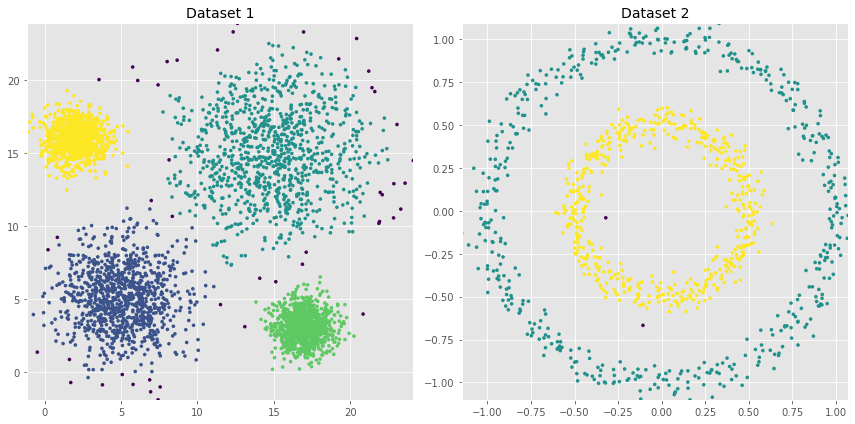

Sanity check tests passed!


In [61]:

from sklearn.cluster import DBSCAN

# Define eps values for the two datasets
eps_1 = 1
eps_2 = 0.1

### STUDENT TASK ###
clusters_1 = DBSCAN(eps = eps_1, min_samples=5, metric='euclidean').fit_predict(dataset1)
clusters_2 = DBSCAN(eps = eps_2, min_samples=5, metric='euclidean').fit_predict(dataset2)

dataset1_noise_points = (clusters_1 == -1).sum()
dataset2_noise_points = (clusters_2 == -1).sum()

print(f'Noise points in Dataset 1:\n {dataset1_noise_points}/{len(clusters_1)} \n')
print(f'Noise points in Dataset 2:\n {dataset2_noise_points}/{len(clusters_2)} \n')

# Plot the clustered datasets
cluster_plots(dataset1, dataset2, clusters_1, clusters_2)


# Perform some sanity checks on the outputs
assert clusters_1.shape == (4000,), 'Shape of clusters_1 is wrong.'
assert clusters_2.shape == (1000,), 'Shape of clusters_2 is wrong.'
assert dataset1_noise_points < 50, 'Number of noise points in dataset 1 should be less than 50.'
assert dataset2_noise_points < 5, 'Number of noise points in dataset 2 should be less than 5.'

print('Sanity check tests passed!')
